In [ ]:
import dvc.api
import pandas as pd
# reading dataset
with dvc.api.open("data/creditcard.csv", repo = "https://github.com/raja-7-c/MLOps_Assignment") as fd:
    df = pd.read_csv(fd)
    
    

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data_unseen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
data = df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (256326, 31)
Unseen Data For Predictions: (28481, 31)


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [5]:
from pycaret.classification import *

In [6]:
expt_basic = setup(
    data = df, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    ignore_features=["Time"],
    normalize = True,
                   transformation = True,
                   normalize_method = "minmax",
                   polynomial_features=True,
                   trigonometry_features=True,
    numeric_imputation="median",        # "mean" by default
    categorical_imputation="mode",      # "constant" (not_available) by default
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
top5 = compare_models(sort ='F1',fold = 5,exclude = ["rf","et","ada","knn"],n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9994,0.9009,0.7920,0.8454,0.8166,0.8163,0.8173,2.0360
lr,Logistic Regression,0.9994,0.9787,0.7210,0.8843,0.7914,0.7911,0.7967,4.8500
dt,Decision Tree Classifier,0.9992,0.8844,0.7691,0.7557,0.7621,0.7616,0.7618,15.6280
svm,SVM - Linear Kernel,0.9992,0.0000,0.6016,0.8723,0.7111,0.7106,0.7235,0.5900
gbc,Gradient Boosting Classifier,0.9991,0.7790,0.6015,0.8625,0.7078,0.7073,0.7194,204.8060
ridge,Ridge Classifier,0.9990,0.0000,0.5180,0.8538,0.6414,0.6409,0.6627,0.3800
lightgbm,Light Gradient Boosting Machine,0.9954,0.7546,0.6145,0.2138,0.3152,0.3135,0.3593,6.1800
qda,Quadratic Discriminant Analysis,0.9881,0.9592,0.8655,0.1154,0.2033,0.2008,0.3129,1.7880
nb,Naive Bayes,0.9745,0.9533,0.8427,0.0549,0.1030,0.1001,0.2111,1.4720


In [9]:
for model in top5:
    print(model)
    print()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=Fals

In [10]:
dt = top5[2]

# tune hyperparameters with custom_grid
dt_params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_dt =tune_model(dt, optimize='F1',custom_grid = dt_params, fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.8881,0.7179,0.8889,0.7943,0.7940,0.7986
1,0.9993,0.8697,0.7215,0.8636,0.7862,0.7859,0.7891
2,0.9994,0.8923,0.7342,0.8923,0.8056,0.8053,0.8091
3,0.9994,0.9086,0.7468,0.9077,0.8194,0.8192,0.8231
4,0.9994,0.9098,0.7975,0.8514,0.8235,0.8232,0.8237
Mean,0.9994,0.8937,0.7436,0.8808,0.8058,0.8055,0.8087
SD,0.0000,0.0148,0.0288,0.0204,0.0143,0.0143,0.0136


In [11]:
lda = top5[0]
tuned_lda = tune_model(lda,optimize='AUC',n_iter =30,fold =6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9298,0.8485,0.8358,0.8421,0.8418,0.8419
1,0.9993,0.8836,0.7077,0.8846,0.7863,0.7860,0.7909
2,0.9994,0.9222,0.8000,0.8387,0.8189,0.8186,0.8188
3,0.9994,0.8932,0.7576,0.8929,0.8197,0.8194,0.8222
4,0.9994,0.9308,0.8030,0.8281,0.8154,0.8151,0.8152
5,0.9994,0.9229,0.8182,0.8438,0.8308,0.8305,0.8306
Mean,0.9994,0.9138,0.7892,0.8540,0.8189,0.8186,0.8199
SD,0.0000,0.0184,0.0453,0.0251,0.0171,0.0171,0.0156


In [12]:
lr = top5[1]
tuned_lr = tune_model(lr,optimize='F1',n_iter = 25, fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9739,0.8030,0.8983,0.8480,0.8478,0.8491
1,0.9993,0.9822,0.6462,0.8936,0.7500,0.7496,0.7595
2,0.9993,0.9718,0.6923,0.8824,0.7759,0.7755,0.7813
3,0.9994,0.9807,0.7424,0.8909,0.8099,0.8096,0.8130
4,0.9994,0.9949,0.7576,0.8772,0.8130,0.8127,0.8149
5,0.9993,0.9669,0.7424,0.8448,0.7903,0.7900,0.7916
Mean,0.9994,0.9784,0.7307,0.8812,0.7979,0.7975,0.8016
SD,0.0001,0.0090,0.0498,0.0177,0.0309,0.0309,0.0284


In [13]:
sgd = top5[3]
tuned_sgd = tune_model(sgd,optimize='F1',n_iter = 25, fold = 6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.0000,0.8333,0.8871,0.8594,0.8591,0.8596
1,0.9993,0.0000,0.6923,0.8654,0.7692,0.7689,0.7737
2,0.9993,0.0000,0.7538,0.8448,0.7967,0.7964,0.7977
3,0.9995,0.0000,0.7576,0.9259,0.8333,0.8331,0.8373
4,0.9994,0.0000,0.8030,0.8548,0.8281,0.8278,0.8282
5,0.9994,0.0000,0.7879,0.8525,0.8189,0.8186,0.8192
Mean,0.9994,0.0000,0.7713,0.8718,0.8176,0.8173,0.8193
SD,0.0001,0.0000,0.0445,0.0277,0.0285,0.0286,0.0276


In [14]:
gbc = top5[4]
tuned_gbc = tune_model(gbc,n_iter = 10,optimize='F1', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9270,0.6410,0.9091,0.7519,0.7515,0.7631
1,0.9993,0.9224,0.5949,0.9592,0.7344,0.7340,0.7551
2,0.9994,0.9031,0.6709,0.9464,0.7852,0.7849,0.7966
3,0.9994,0.9291,0.6835,0.9310,0.7883,0.7880,0.7975
4,0.9993,0.9287,0.6835,0.9000,0.7770,0.7766,0.7840
Mean,0.9993,0.9220,0.6548,0.9291,0.7673,0.7670,0.7792
SD,0.0000,0.0098,0.0337,0.0222,0.0209,0.0209,0.0173


In [15]:
blended_model = blend_models(estimator_list=[tuned_lda, tuned_dt, tuned_lr, tuned_sgd, tuned_gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.0000,0.8718,0.8293,0.8500,0.8497,0.8500
1,0.9995,0.0000,0.7250,0.9667,0.8286,0.8283,0.8369
2,0.9994,0.0000,0.6750,0.9643,0.7941,0.7938,0.8065
3,0.9993,0.0000,0.7000,0.8485,0.7671,0.7668,0.7703
4,0.9993,0.0000,0.7250,0.8286,0.7733,0.7730,0.7747
5,0.9994,0.0000,0.7179,0.9333,0.8116,0.8113,0.8183
6,0.9995,0.0000,0.7949,0.9118,0.8493,0.8491,0.8511
7,0.9994,0.0000,0.7692,0.8571,0.8108,0.8105,0.8117
8,0.9994,0.0000,0.8462,0.8049,0.8250,0.8247,0.8250
9,0.9995,0.0000,0.7949,0.9118,0.8493,0.8491,0.8511


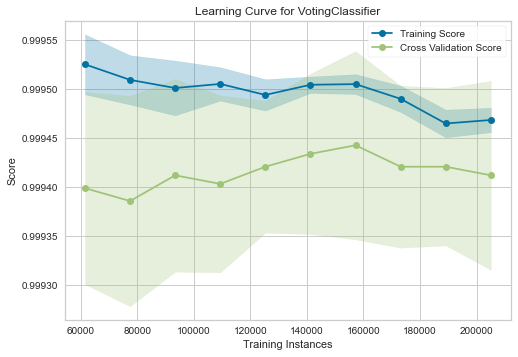

In [16]:
plot_model(blended_model, plot="learning")

In [17]:
plot_model(blended_model, plot = 'pr')

IntProgress(value=0, description='Processing: ', max=5)

ModelError: PrecisionRecallCurve requires an estimator with predict_proba or decision_function.

<Figure size 576x396 with 0 Axes>

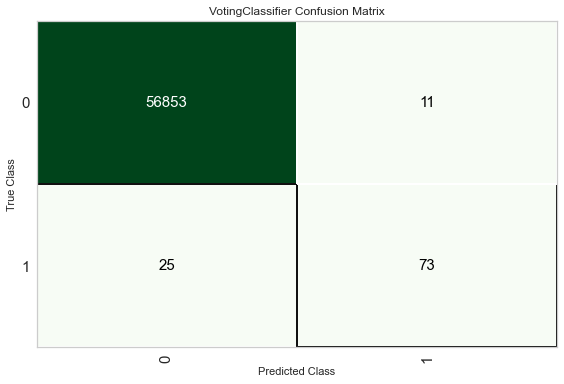

In [18]:
plot_model(blended_model, plot="confusion_matrix")      # plotting confusion matrix of blended model       

In [19]:
predict_model(blended_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9994,0.8724,0.7449,0.8690,0.8022,0.8019,0.8043


In [20]:
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0


In [21]:
save_model(blended_model,'pycaret_blended_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Time'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                                                           min_impurity_decrease=0.5,
                                                                           min_impurity_split=None,
                                                                       